In [1]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import pandas as pd
import seaborn as sns
from images_segmentation import two_level_otsu as tlot
from images_segmentation import dicescore as dsc

Using matplotlib backend: <object object at 0x10810ae30>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'images_segmentation'

In [2]:
def stretch(x):
    intensities = []
   
    img = x.copy()
    lower_quantile, upper_quantile = np.percentile(x, (2,  98))

    img[img < lower_quantile] = lower_quantile
    img[img > upper_quantile] = upper_quantile
    
    for i in np.ndindex(img.shape):
        intensities.append(img[i])
   
    img_max = max(intensities)
    img_min = min(intensities)
    img_stretch = (img-img_min)*(256 / (img_max-img_min))
    return img_stretch

In [3]:
# Load raw images of NIH3T3-dataset

img_NIH3T3_1 = imread(r"data/Otsu_data/NIH3T3/img/dna-0.png")
img_NIH3T3_2 = imread(r"data/Otsu_data/NIH3T3/img/dna-1.png")
img_NIH3T3_3 = imread(r"data/Otsu_data/NIH3T3/img/dna-26.png")
img_NIH3T3_4 = imread(r"data/Otsu_data/NIH3T3/img/dna-27.png")
img_NIH3T3_5 = imread(r"data/Otsu_data/NIH3T3/img/dna-28.png")
img_NIH3T3_6 = imread(r"data/Otsu_data/NIH3T3/img/dna-29.png")
img_NIH3T3_7 = imread(r"data/Otsu_data/NIH3T3/img/dna-30.png")
img_NIH3T3_8 = imread(r"data/Otsu_data/NIH3T3/img/dna-31.png")
img_NIH3T3_9 = imread(r"data/Otsu_data/NIH3T3/img/dna-32.png")
img_NIH3T3_10 = imread(r"data/Otsu_data/NIH3T3/img/dna-33.png")
img_NIH3T3_11 = imread(r"data/Otsu_data/NIH3T3/img/dna-37.png")
img_NIH3T3_12 = imread(r"data/Otsu_data/NIH3T3/img/dna-40.png")
img_NIH3T3_13 = imread(r"data/Otsu_data/NIH3T3/img/dna-42.png")
img_NIH3T3_14 = imread(r"data/Otsu_data/NIH3T3/img/dna-44.png")
img_NIH3T3_15 = imread(r"data/Otsu_data/NIH3T3/img/dna-45.png")
img_NIH3T3_16 = imread(r"data/Otsu_data/NIH3T3/img/dna-46.png")
img_NIH3T3_17 = imread(r"data/Otsu_data/NIH3T3/img/dna-47.png")
img_NIH3T3_18 = imread(r"data/Otsu_data/NIH3T3/img/dna-49.png")

# Load ground truth images of NIH3T3-dataset
 
gt_NIH3T3_1 = imread(r"data/Otsu_data/NIH3T3/gt/0.png")
gt_NIH3T3_2 = imread(r"data/Otsu_data/NIH3T3/gt/1.png")
gt_NIH3T3_3 = imread(r"data/Otsu_data/NIH3T3/gt/26.png")
gt_NIH3T3_4 = imread(r"data/Otsu_data/NIH3T3/gt/27.png")
gt_NIH3T3_5 = imread(r"data/Otsu_data/NIH3T3/gt/28.png")
gt_NIH3T3_6 = imread(r"data/Otsu_data/NIH3T3/gt/29.png")
gt_NIH3T3_7 = imread(r"data/Otsu_data/NIH3T3/gt/30.png")
gt_NIH3T3_8 = imread(r"data/Otsu_data/NIH3T3/gt/31.png")
gt_NIH3T3_9 = imread(r"data/Otsu_data/NIH3T3/gt/32.png")
gt_NIH3T3_10 = imread(r"data/Otsu_data/NIH3T3/gt/33.png")
gt_NIH3T3_11 = imread(r"data/Otsu_data/NIH3T3/gt/37.png")
gt_NIH3T3_12 = imread(r"data/Otsu_data/NIH3T3/gt/40.png")
gt_NIH3T3_13 = imread(r"data/Otsu_data/NIH3T3/gt/42.png")
gt_NIH3T3_14 = imread(r"data/Otsu_data/NIH3T3/gt/44.png")
gt_NIH3T3_15 = imread(r"data/Otsu_data/NIH3T3/gt/45.png")
gt_NIH3T3_16 = imread(r"data/Otsu_data/NIH3T3/gt/46.png")
gt_NIH3T3_17 = imread(r"data/Otsu_data/NIH3T3/gt/47.png")
gt_NIH3T3_18 = imread(r"data/Otsu_data/NIH3T3/gt/49.png")

In [4]:
copy_img_NIH3T3_1 = img_NIH3T3_1.copy()
copy_img_NIH3T3_2 = img_NIH3T3_2.copy()
copy_img_NIH3T3_3 = img_NIH3T3_3.copy()
copy_img_NIH3T3_4 = img_NIH3T3_4.copy()
copy_img_NIH3T3_5 = img_NIH3T3_5.copy()
copy_img_NIH3T3_6 = img_NIH3T3_6.copy()
copy_img_NIH3T3_7 = img_NIH3T3_7.copy()
copy_img_NIH3T3_8 = img_NIH3T3_8.copy()
copy_img_NIH3T3_9 = img_NIH3T3_9.copy()
copy_img_NIH3T3_10 = img_NIH3T3_10.copy()
copy_img_NIH3T3_11 = img_NIH3T3_11.copy()
copy_img_NIH3T3_12 = img_NIH3T3_12.copy()
copy_img_NIH3T3_13 = img_NIH3T3_13.copy()
copy_img_NIH3T3_14 = img_NIH3T3_14.copy()
copy_img_NIH3T3_15 = img_NIH3T3_15.copy()
copy_img_NIH3T3_16 = img_NIH3T3_16.copy()
copy_img_NIH3T3_17 = img_NIH3T3_17.copy()
copy_img_NIH3T3_18 = img_NIH3T3_18.copy()

In [5]:
median_img_NIH3T3_1 = scipy.ndimage.median_filter(copy_img_NIH3T3_1, 5)
median_img_NIH3T3_2 = scipy.ndimage.median_filter(copy_img_NIH3T3_2, 5)
median_img_NIH3T3_3 = scipy.ndimage.median_filter(copy_img_NIH3T3_3, 5)
median_img_NIH3T3_4 = scipy.ndimage.median_filter(copy_img_NIH3T3_4, 5)
median_img_NIH3T3_5 = scipy.ndimage.median_filter(copy_img_NIH3T3_5, 5)
median_img_NIH3T3_6 = scipy.ndimage.median_filter(copy_img_NIH3T3_6, 5)
median_img_NIH3T3_7 = scipy.ndimage.median_filter(copy_img_NIH3T3_7, 5)
median_img_NIH3T3_8 = scipy.ndimage.median_filter(copy_img_NIH3T3_8, 5)
median_img_NIH3T3_9 = scipy.ndimage.median_filter(copy_img_NIH3T3_9, 5)
median_img_NIH3T3_10 = scipy.ndimage.median_filter(copy_img_NIH3T3_10, 5)
median_img_NIH3T3_11 = scipy.ndimage.median_filter(copy_img_NIH3T3_11, 5)
median_img_NIH3T3_12 = scipy.ndimage.median_filter(copy_img_NIH3T3_12, 5)
median_img_NIH3T3_13 = scipy.ndimage.median_filter(copy_img_NIH3T3_13, 5)
median_img_NIH3T3_14 = scipy.ndimage.median_filter(copy_img_NIH3T3_14, 5)
median_img_NIH3T3_15 = scipy.ndimage.median_filter(copy_img_NIH3T3_15, 5)
median_img_NIH3T3_16 = scipy.ndimage.median_filter(copy_img_NIH3T3_16, 5)
median_img_NIH3T3_17 = scipy.ndimage.median_filter(copy_img_NIH3T3_17, 5)
median_img_NIH3T3_18 = scipy.ndimage.median_filter(copy_img_NIH3T3_18, 5)

In [6]:
gauss_img_NIH3T3_1 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_1, 5)
gauss_img_NIH3T3_2 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_2, 5)
gauss_img_NIH3T3_3 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_3, 5)
gauss_img_NIH3T3_4 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_4, 5)
gauss_img_NIH3T3_5 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_5, 5)
gauss_img_NIH3T3_6 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_6, 5)
gauss_img_NIH3T3_7 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_7, 5)
gauss_img_NIH3T3_8 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_8, 5)
gauss_img_NIH3T3_9 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_9, 5)
gauss_img_NIH3T3_10 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_10, 5)
gauss_img_NIH3T3_11 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_11, 5)
gauss_img_NIH3T3_12 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_12, 5)
gauss_img_NIH3T3_13 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_13, 5)
gauss_img_NIH3T3_14 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_14, 5)
gauss_img_NIH3T3_15 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_15, 5)
gauss_img_NIH3T3_16 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_16, 5)
gauss_img_NIH3T3_17 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_17, 5)
gauss_img_NIH3T3_18 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_18, 5)

In [7]:
stretch_img_NIH3T3_1 = stretch(copy_img_NIH3T3_1)
stretch_img_NIH3T3_2 = stretch(copy_img_NIH3T3_2)
stretch_img_NIH3T3_3 = stretch(copy_img_NIH3T3_3)
stretch_img_NIH3T3_4 = stretch(copy_img_NIH3T3_4)
stretch_img_NIH3T3_5 = stretch(copy_img_NIH3T3_5)
stretch_img_NIH3T3_6 = stretch(copy_img_NIH3T3_6)
stretch_img_NIH3T3_7 = stretch(copy_img_NIH3T3_7)
stretch_img_NIH3T3_8 = stretch(copy_img_NIH3T3_8)
stretch_img_NIH3T3_9 = stretch(copy_img_NIH3T3_9)
stretch_img_NIH3T3_10 = stretch(copy_img_NIH3T3_10)
stretch_img_NIH3T3_11 = stretch(copy_img_NIH3T3_11)
stretch_img_NIH3T3_12 = stretch(copy_img_NIH3T3_12)
stretch_img_NIH3T3_13 = stretch(copy_img_NIH3T3_13)
stretch_img_NIH3T3_14 = stretch(copy_img_NIH3T3_14)
stretch_img_NIH3T3_15 = stretch(copy_img_NIH3T3_15)
stretch_img_NIH3T3_16 = stretch(copy_img_NIH3T3_16)
stretch_img_NIH3T3_17 = stretch(copy_img_NIH3T3_17)
stretch_img_NIH3T3_18 = stretch(copy_img_NIH3T3_18)

In [8]:
median_stretch_img_NIH3T3_1 = stretch(median_img_NIH3T3_1)
median_stretch_img_NIH3T3_2 = stretch(median_img_NIH3T3_2)
median_stretch_img_NIH3T3_3 = stretch(median_img_NIH3T3_3)
median_stretch_img_NIH3T3_4 = stretch(median_img_NIH3T3_4)
median_stretch_img_NIH3T3_5 = stretch(median_img_NIH3T3_5)
median_stretch_img_NIH3T3_6 = stretch(median_img_NIH3T3_6)
median_stretch_img_NIH3T3_7 = stretch(median_img_NIH3T3_7)
median_stretch_img_NIH3T3_8 = stretch(median_img_NIH3T3_8)
median_stretch_img_NIH3T3_9 = stretch(median_img_NIH3T3_9)
median_stretch_img_NIH3T3_10 = stretch(median_img_NIH3T3_10)
median_stretch_img_NIH3T3_11 = stretch(median_img_NIH3T3_11)
median_stretch_img_NIH3T3_12 = stretch(median_img_NIH3T3_12)
median_stretch_img_NIH3T3_13 = stretch(median_img_NIH3T3_13)
median_stretch_img_NIH3T3_14 = stretch(median_img_NIH3T3_14)
median_stretch_img_NIH3T3_15 = stretch(median_img_NIH3T3_15)
median_stretch_img_NIH3T3_16 = stretch(median_img_NIH3T3_16)
median_stretch_img_NIH3T3_17 = stretch(median_img_NIH3T3_17)
median_stretch_img_NIH3T3_18 = stretch(median_img_NIH3T3_18)

In [9]:
stretch_median_img_NIH3T3_1 = scipy.ndimage.median_filter(stretch_img_NIH3T3_1, 5)
stretch_median_img_NIH3T3_2 = scipy.ndimage.median_filter(stretch_img_NIH3T3_2, 5)
stretch_median_img_NIH3T3_3 = scipy.ndimage.median_filter(stretch_img_NIH3T3_3, 5)
stretch_median_img_NIH3T3_4 = scipy.ndimage.median_filter(stretch_img_NIH3T3_4, 5)
stretch_median_img_NIH3T3_5 = scipy.ndimage.median_filter(stretch_img_NIH3T3_5, 5)
stretch_median_img_NIH3T3_6 = scipy.ndimage.median_filter(stretch_img_NIH3T3_6, 5)
stretch_median_img_NIH3T3_7 = scipy.ndimage.median_filter(stretch_img_NIH3T3_7, 5)
stretch_median_img_NIH3T3_8 = scipy.ndimage.median_filter(stretch_img_NIH3T3_8, 5)
stretch_median_img_NIH3T3_9 = scipy.ndimage.median_filter(stretch_img_NIH3T3_9, 5)
stretch_median_img_NIH3T3_10 = scipy.ndimage.median_filter(stretch_img_NIH3T3_10, 5)
stretch_median_img_NIH3T3_11 = scipy.ndimage.median_filter(stretch_img_NIH3T3_11, 5)
stretch_median_img_NIH3T3_12 = scipy.ndimage.median_filter(stretch_img_NIH3T3_12, 5)
stretch_median_img_NIH3T3_13 = scipy.ndimage.median_filter(stretch_img_NIH3T3_13, 5)
stretch_median_img_NIH3T3_14 = scipy.ndimage.median_filter(stretch_img_NIH3T3_14, 5)
stretch_median_img_NIH3T3_15 = scipy.ndimage.median_filter(stretch_img_NIH3T3_15, 5)
stretch_median_img_NIH3T3_16 = scipy.ndimage.median_filter(stretch_img_NIH3T3_16, 5)
stretch_median_img_NIH3T3_17 = scipy.ndimage.median_filter(stretch_img_NIH3T3_17, 5)
stretch_median_img_NIH3T3_18 = scipy.ndimage.median_filter(stretch_img_NIH3T3_18, 5)

In [10]:
gauss_stretch_img_NIH3T3_1 = stretch(gauss_img_NIH3T3_1)
gauss_stretch_img_NIH3T3_2 = stretch(gauss_img_NIH3T3_2)
gauss_stretch_img_NIH3T3_3 = stretch(gauss_img_NIH3T3_3)
gauss_stretch_img_NIH3T3_4 = stretch(gauss_img_NIH3T3_4)
gauss_stretch_img_NIH3T3_5 = stretch(gauss_img_NIH3T3_5)
gauss_stretch_img_NIH3T3_6 = stretch(gauss_img_NIH3T3_6)
gauss_stretch_img_NIH3T3_7 = stretch(gauss_img_NIH3T3_7)
gauss_stretch_img_NIH3T3_8 = stretch(gauss_img_NIH3T3_8)
gauss_stretch_img_NIH3T3_9 = stretch(gauss_img_NIH3T3_9)
gauss_stretch_img_NIH3T3_10 = stretch(gauss_img_NIH3T3_10)
gauss_stretch_img_NIH3T3_11 = stretch(gauss_img_NIH3T3_11)
gauss_stretch_img_NIH3T3_12 = stretch(gauss_img_NIH3T3_12)
gauss_stretch_img_NIH3T3_13 = stretch(gauss_img_NIH3T3_13)
gauss_stretch_img_NIH3T3_14 = stretch(gauss_img_NIH3T3_14)
gauss_stretch_img_NIH3T3_15 = stretch(gauss_img_NIH3T3_15)
gauss_stretch_img_NIH3T3_16 = stretch(gauss_img_NIH3T3_16)
gauss_stretch_img_NIH3T3_17 = stretch(gauss_img_NIH3T3_17)
gauss_stretch_img_NIH3T3_18 = stretch(gauss_img_NIH3T3_18)

In [11]:
stretch_gauss_img_NIH3T3_1 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_1, 5)
stretch_gauss_img_NIH3T3_2 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_2, 5)
stretch_gauss_img_NIH3T3_3 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_3, 5)
stretch_gauss_img_NIH3T3_4 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_4, 5)
stretch_gauss_img_NIH3T3_5 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_5, 5)
stretch_gauss_img_NIH3T3_6 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_6, 5)
stretch_gauss_img_NIH3T3_7 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_7, 5)
stretch_gauss_img_NIH3T3_8 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_8, 5)
stretch_gauss_img_NIH3T3_9 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_9, 5)
stretch_gauss_img_NIH3T3_10 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_10, 5)
stretch_gauss_img_NIH3T3_11 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_11, 5)
stretch_gauss_img_NIH3T3_12 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_12, 5)
stretch_gauss_img_NIH3T3_13 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_13, 5)
stretch_gauss_img_NIH3T3_14 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_14, 5)
stretch_gauss_img_NIH3T3_15 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_15, 5)
stretch_gauss_img_NIH3T3_16 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_16, 5)
stretch_gauss_img_NIH3T3_17 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_17, 5)
stretch_gauss_img_NIH3T3_18 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_18, 5)

In [12]:
otsu_img_NIH3T3_1 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_1 , 256)
otsu_img_NIH3T3_2 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_2 , 256)
otsu_img_NIH3T3_3 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_3 , 256)
otsu_img_NIH3T3_4 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_4 , 256)
otsu_img_NIH3T3_5 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_5 , 256)
otsu_img_NIH3T3_6 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_6 , 256)
otsu_img_NIH3T3_7 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_7 , 256)
otsu_img_NIH3T3_8 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_8 , 256)
otsu_img_NIH3T3_9 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_9 , 256)
otsu_img_NIH3T3_10 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_10 , 256)
otsu_img_NIH3T3_11 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_11 , 256)
otsu_img_NIH3T3_12 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_12 , 256)
otsu_img_NIH3T3_13 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_13 , 256)
otsu_img_NIH3T3_14 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_14 , 256)
otsu_img_NIH3T3_15 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_15 , 256)
otsu_img_NIH3T3_16 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_16 , 256)
otsu_img_NIH3T3_17 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_17 , 256)
otsu_img_NIH3T3_18 = tlot.two_level_otsu_thresholding_clip(copy_img_NIH3T3_18 , 256)

In [13]:
otsu_median_img_NIH3T3_1 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_1 , 256)
otsu_median_img_NIH3T3_2 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_2 , 256)
otsu_median_img_NIH3T3_3 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_3 , 256)
otsu_median_img_NIH3T3_4 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_4 , 256)
otsu_median_img_NIH3T3_5 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_5 , 256)
otsu_median_img_NIH3T3_6 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_6 , 256)
otsu_median_img_NIH3T3_7 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_7 , 256)
otsu_median_img_NIH3T3_8 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_8 , 256)
otsu_median_img_NIH3T3_9 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_9 , 256)
otsu_median_img_NIH3T3_10 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_10 , 256)
otsu_median_img_NIH3T3_11 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_11 , 256)
otsu_median_img_NIH3T3_12 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_12 , 256)
otsu_median_img_NIH3T3_13 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_13 , 256)
otsu_median_img_NIH3T3_14 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_14 , 256)
otsu_median_img_NIH3T3_15 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_15 , 256)
otsu_median_img_NIH3T3_16 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_16 , 256)
otsu_median_img_NIH3T3_17 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_17 , 256)
otsu_median_img_NIH3T3_18 = tlot.two_level_otsu_thresholding_clip(median_img_NIH3T3_18 , 256)

In [14]:
otsu_gauss_img_NIH3T3_1 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_1 , 256)
otsu_gauss_img_NIH3T3_2 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_2 , 256)
otsu_gauss_img_NIH3T3_3 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_3 , 256)
otsu_gauss_img_NIH3T3_4 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_4 , 256)
otsu_gauss_img_NIH3T3_5 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_5 , 256)
otsu_gauss_img_NIH3T3_6 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_6 , 256)
otsu_gauss_img_NIH3T3_7 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_7 , 256)
otsu_gauss_img_NIH3T3_8 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_8 , 256)
otsu_gauss_img_NIH3T3_9 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_9 , 256)
otsu_gauss_img_NIH3T3_10 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_10 , 256)
otsu_gauss_img_NIH3T3_11 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_11 , 256)
otsu_gauss_img_NIH3T3_12 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_12 , 256)
otsu_gauss_img_NIH3T3_13 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_13 , 256)
otsu_gauss_img_NIH3T3_14 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_14 , 256)
otsu_gauss_img_NIH3T3_15 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_15 , 256)
otsu_gauss_img_NIH3T3_16 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_16 , 256)
otsu_gauss_img_NIH3T3_17 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_17 , 256)
otsu_gauss_img_NIH3T3_18 = tlot.two_level_otsu_thresholding_clip(gauss_img_NIH3T3_18 , 256)

In [15]:
otsu_stretch_img_NIH3T3_1 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_1 , 256)
otsu_stretch_img_NIH3T3_2 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_2 , 256)
otsu_stretch_img_NIH3T3_3 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_3 , 256)
otsu_stretch_img_NIH3T3_4 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_4 , 256)
otsu_stretch_img_NIH3T3_5 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_5 , 256)
otsu_stretch_img_NIH3T3_6 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_6 , 256)
otsu_stretch_img_NIH3T3_7 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_7 , 256)
otsu_stretch_img_NIH3T3_8 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_8 , 256)
otsu_stretch_img_NIH3T3_9 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_9 , 256)
otsu_stretch_img_NIH3T3_10 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_10 , 256)
otsu_stretch_img_NIH3T3_11 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_11 , 256)
otsu_stretch_img_NIH3T3_12 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_12 , 256)
otsu_stretch_img_NIH3T3_13 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_13 , 256)
otsu_stretch_img_NIH3T3_14 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_14 , 256)
otsu_stretch_img_NIH3T3_15 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_15 , 256)
otsu_stretch_img_NIH3T3_16 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_16 , 256)
otsu_stretch_img_NIH3T3_17 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_17 , 256)
otsu_stretch_img_NIH3T3_18 = tlot.two_level_otsu_thresholding_clip(stretch_img_NIH3T3_18 , 256)


In [16]:
otsu_median_stretch_img_NIH3T3_1 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_1 , 256)
otsu_median_stretch_img_NIH3T3_2 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_2 , 256)
otsu_median_stretch_img_NIH3T3_3 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_3 , 256)
otsu_median_stretch_img_NIH3T3_4 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_4 , 256)
otsu_median_stretch_img_NIH3T3_5 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_5 , 256)
otsu_median_stretch_img_NIH3T3_6 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_6 , 256)
otsu_median_stretch_img_NIH3T3_7 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_7 , 256)
otsu_median_stretch_img_NIH3T3_8 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_8 , 256)
otsu_median_stretch_img_NIH3T3_9 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_9 , 256)
otsu_median_stretch_img_NIH3T3_10 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_10 , 256)
otsu_median_stretch_img_NIH3T3_11 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_11 , 256)
otsu_median_stretch_img_NIH3T3_12 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_12 , 256)
otsu_median_stretch_img_NIH3T3_13 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_13 , 256)
otsu_median_stretch_img_NIH3T3_14 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_14 , 256)
otsu_median_stretch_img_NIH3T3_15 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_15 , 256)
otsu_median_stretch_img_NIH3T3_16 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_16 , 256)
otsu_median_stretch_img_NIH3T3_17 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_17 , 256)
otsu_median_stretch_img_NIH3T3_18 = tlot.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3_18 , 256)


In [17]:
otsu_stretch_median_img_NIH3T3_1 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_1 , 256)
otsu_stretch_median_img_NIH3T3_2 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_2 , 256)
otsu_stretch_median_img_NIH3T3_3 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_3 , 256)
otsu_stretch_median_img_NIH3T3_4 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_4 , 256)
otsu_stretch_median_img_NIH3T3_5 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_5 , 256)
otsu_stretch_median_img_NIH3T3_6 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_6 , 256)
otsu_stretch_median_img_NIH3T3_7 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_7 , 256)
otsu_stretch_median_img_NIH3T3_8 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_8 , 256)
otsu_stretch_median_img_NIH3T3_9 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_9 , 256)
otsu_stretch_median_img_NIH3T3_10 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_10 , 256)
otsu_stretch_median_img_NIH3T3_11 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_11 , 256)
otsu_stretch_median_img_NIH3T3_12 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_12 , 256)
otsu_stretch_median_img_NIH3T3_13 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_13 , 256)
otsu_stretch_median_img_NIH3T3_14 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_14 , 256)
otsu_stretch_median_img_NIH3T3_15 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_15 , 256)
otsu_stretch_median_img_NIH3T3_16 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_16 , 256)
otsu_stretch_median_img_NIH3T3_17 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_17 , 256)
otsu_stretch_median_img_NIH3T3_18 = tlot.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3_18 , 256)

In [18]:
otsu_gauss_stretch_img_NIH3T3_1 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_1 , 256)
otsu_gauss_stretch_img_NIH3T3_2 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_2 , 256)
otsu_gauss_stretch_img_NIH3T3_3 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_3 , 256)
otsu_gauss_stretch_img_NIH3T3_4 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_4 , 256)
otsu_gauss_stretch_img_NIH3T3_5 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_5 , 256)
otsu_gauss_stretch_img_NIH3T3_6 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_6 , 256)
otsu_gauss_stretch_img_NIH3T3_7 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_7 , 256)
otsu_gauss_stretch_img_NIH3T3_8 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_8 , 256)
otsu_gauss_stretch_img_NIH3T3_9 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_9 , 256)
otsu_gauss_stretch_img_NIH3T3_10 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_10 , 256)
otsu_gauss_stretch_img_NIH3T3_11 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_11 , 256)
otsu_gauss_stretch_img_NIH3T3_12 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_12 , 256)
otsu_gauss_stretch_img_NIH3T3_13 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_13 , 256)
otsu_gauss_stretch_img_NIH3T3_14 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_14 , 256)
otsu_gauss_stretch_img_NIH3T3_15 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_15 , 256)
otsu_gauss_stretch_img_NIH3T3_16 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_16 , 256)
otsu_gauss_stretch_img_NIH3T3_17 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_17 , 256)
otsu_gauss_stretch_img_NIH3T3_18 = tlot.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3_18 , 256)

In [19]:
otsu_stretch_gauss_img_NIH3T3_1 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_1 , 256)
otsu_stretch_gauss_img_NIH3T3_2 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_2 , 256)
otsu_stretch_gauss_img_NIH3T3_3 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_3 , 256)
otsu_stretch_gauss_img_NIH3T3_4 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_4 , 256)
otsu_stretch_gauss_img_NIH3T3_5 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_5 , 256)
otsu_stretch_gauss_img_NIH3T3_6 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_6 , 256)
otsu_stretch_gauss_img_NIH3T3_7 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_7 , 256)
otsu_stretch_gauss_img_NIH3T3_8 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_8 , 256)
otsu_stretch_gauss_img_NIH3T3_9 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_9 , 256)
otsu_stretch_gauss_img_NIH3T3_10 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_10 , 256)
otsu_stretch_gauss_img_NIH3T3_11 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_11 , 256)
otsu_stretch_gauss_img_NIH3T3_12 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_12 , 256)
otsu_stretch_gauss_img_NIH3T3_13 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_13 , 256)
otsu_stretch_gauss_img_NIH3T3_14 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_14 , 256)
otsu_stretch_gauss_img_NIH3T3_15 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_15 , 256)
otsu_stretch_gauss_img_NIH3T3_16 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_16 , 256)
otsu_stretch_gauss_img_NIH3T3_17 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_17 , 256)
otsu_stretch_gauss_img_NIH3T3_18 = tlot.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3_18 , 256)

In [20]:
# Dice score - NIH3T3-dataset
## no preprocessing

NIH3T3_no_preprocessing = []

dice_otsu_img_NIH3T3_1 = dsc.dice(otsu_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_img_NIH3T3_2 = dsc.dice(otsu_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_img_NIH3T3_3 = dsc.dice(otsu_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_img_NIH3T3_4 = dsc.dice(otsu_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_img_NIH3T3_5 = dsc.dice(otsu_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_img_NIH3T3_6 = dsc.dice(otsu_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_img_NIH3T3_7 = dsc.dice(otsu_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_img_NIH3T3_8 = dsc.dice(otsu_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_img_NIH3T3_9 = dsc.dice(otsu_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_img_NIH3T3_10 = dsc.dice(otsu_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_img_NIH3T3_11 = dsc.dice(otsu_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_img_NIH3T3_12 = dsc.dice(otsu_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_img_NIH3T3_13 = dsc.dice(otsu_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_img_NIH3T3_14 = dsc.dice(otsu_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_img_NIH3T3_15 = dsc.dice(otsu_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_img_NIH3T3_16 = dsc.dice(otsu_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_img_NIH3T3_17 = dsc.dice(otsu_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_img_NIH3T3_18 = dsc.dice(otsu_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_no_preprocessing.extend([dice_otsu_img_NIH3T3_1 , dice_otsu_img_NIH3T3_2 , dice_otsu_img_NIH3T3_3 , dice_otsu_img_NIH3T3_4 , dice_otsu_img_NIH3T3_5 , dice_otsu_img_NIH3T3_6 , dice_otsu_img_NIH3T3_7 , dice_otsu_img_NIH3T3_8 , dice_otsu_img_NIH3T3_9 , dice_otsu_img_NIH3T3_10 , dice_otsu_img_NIH3T3_11 , dice_otsu_img_NIH3T3_12 , dice_otsu_img_NIH3T3_13 , dice_otsu_img_NIH3T3_14 , dice_otsu_img_NIH3T3_15 , dice_otsu_img_NIH3T3_16 , dice_otsu_img_NIH3T3_17 , dice_otsu_img_NIH3T3_18])

print(NIH3T3_no_preprocessing)

[0.8175567059223432, 0.7641330523780855, 0.3169086905969374, 0.7575338566025459, 0.7559234810310762, 0.7445915361959387, 0.6921118996297072, 0.7097600154594973, 0.4124606744520657, 0.6165896391376976, 0.6524872222683588, 0.20382743562653202, 0.5091473215831288, 0.47106917681277655, 0.3218088876557375, 0.6462982808860389, 0.7373557667869669, 0.15138678296573033]


In [21]:
# Dice score - N2DLHeLa-dataset
## median filter

NIH3T3_median_filter = []

dice_otsu_median_img_NIH3T3_1 = dsc.dice(otsu_median_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_median_img_NIH3T3_2 = dsc.dice(otsu_median_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_median_img_NIH3T3_3 = dsc.dice(otsu_median_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_median_img_NIH3T3_4 = dsc.dice(otsu_median_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_median_img_NIH3T3_5 = dsc.dice(otsu_median_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_median_img_NIH3T3_6 = dsc.dice(otsu_median_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_median_img_NIH3T3_7 = dsc.dice(otsu_median_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_median_img_NIH3T3_8 = dsc.dice(otsu_median_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_median_img_NIH3T3_9 = dsc.dice(otsu_median_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_median_img_NIH3T3_10 = dsc.dice(otsu_median_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_median_img_NIH3T3_11 = dsc.dice(otsu_median_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_median_img_NIH3T3_12 = dsc.dice(otsu_median_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_median_img_NIH3T3_13 = dsc.dice(otsu_median_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_median_img_NIH3T3_14 = dsc.dice(otsu_median_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_median_img_NIH3T3_15 = dsc.dice(otsu_median_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_median_img_NIH3T3_16 = dsc.dice(otsu_median_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_median_img_NIH3T3_17 = dsc.dice(otsu_median_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_median_img_NIH3T3_18 = dsc.dice(otsu_median_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_median_filter.extend([dice_otsu_median_img_NIH3T3_1 , dice_otsu_median_img_NIH3T3_2 , dice_otsu_median_img_NIH3T3_3 , dice_otsu_median_img_NIH3T3_4 , dice_otsu_median_img_NIH3T3_5 , dice_otsu_median_img_NIH3T3_6 , dice_otsu_median_img_NIH3T3_7 , dice_otsu_median_img_NIH3T3_8 , dice_otsu_median_img_NIH3T3_9 , dice_otsu_median_img_NIH3T3_10 , dice_otsu_median_img_NIH3T3_11 , dice_otsu_median_img_NIH3T3_12 , dice_otsu_median_img_NIH3T3_13 , dice_otsu_median_img_NIH3T3_14 , dice_otsu_median_img_NIH3T3_15 , dice_otsu_median_img_NIH3T3_16 , dice_otsu_median_img_NIH3T3_17 , dice_otsu_median_img_NIH3T3_18])

print(NIH3T3_median_filter)

[0.8257821585324681, 0.7720095711724686, 0.41214619307708833, 0.7585816180274618, 0.7665580602386816, 0.7492257101640871, 0.672486566764614, 0.7421575863972177, 0.3772601366723491, 0.611437775623182, 0.6528608705517528, 0.16859808617204536, 0.5098418588652799, 0.46023367746783805, 0.32423814226501807, 0.6487674272243379, 0.7393355750352838, 0.1514717936866123]


In [22]:
# Dice score - NIH3T3-dataset
## gaussian filter

NIH3T3_gaussian_filter = []

dice_otsu_gauss_img_NIH3T3_1 = dsc.dice(otsu_gauss_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_gauss_img_NIH3T3_2 = dsc.dice(otsu_gauss_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_gauss_img_NIH3T3_3 = dsc.dice(otsu_gauss_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_gauss_img_NIH3T3_4 = dsc.dice(otsu_gauss_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_gauss_img_NIH3T3_5 = dsc.dice(otsu_gauss_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_gauss_img_NIH3T3_6 = dsc.dice(otsu_gauss_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_gauss_img_NIH3T3_7 = dsc.dice(otsu_gauss_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_gauss_img_NIH3T3_8 = dsc.dice(otsu_gauss_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_gauss_img_NIH3T3_9 = dsc.dice(otsu_gauss_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_gauss_img_NIH3T3_10 = dsc.dice(otsu_gauss_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_gauss_img_NIH3T3_11 = dsc.dice(otsu_gauss_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_gauss_img_NIH3T3_12 = dsc.dice(otsu_gauss_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_gauss_img_NIH3T3_13 = dsc.dice(otsu_gauss_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_gauss_img_NIH3T3_14 = dsc.dice(otsu_gauss_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_gauss_img_NIH3T3_15 = dsc.dice(otsu_gauss_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_gauss_img_NIH3T3_16 = dsc.dice(otsu_gauss_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_gauss_img_NIH3T3_17 = dsc.dice(otsu_gauss_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_gauss_img_NIH3T3_18 = dsc.dice(otsu_gauss_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_gaussian_filter.extend([dice_otsu_gauss_img_NIH3T3_1 , dice_otsu_gauss_img_NIH3T3_2 , dice_otsu_gauss_img_NIH3T3_3 , dice_otsu_gauss_img_NIH3T3_4 , dice_otsu_gauss_img_NIH3T3_5 , dice_otsu_gauss_img_NIH3T3_6 , dice_otsu_gauss_img_NIH3T3_7 , dice_otsu_gauss_img_NIH3T3_8 , dice_otsu_gauss_img_NIH3T3_9 , dice_otsu_gauss_img_NIH3T3_10 , dice_otsu_gauss_img_NIH3T3_11 , dice_otsu_gauss_img_NIH3T3_12 , dice_otsu_gauss_img_NIH3T3_13 , dice_otsu_gauss_img_NIH3T3_14 , dice_otsu_gauss_img_NIH3T3_15 , dice_otsu_gauss_img_NIH3T3_16 , dice_otsu_gauss_img_NIH3T3_17 , dice_otsu_gauss_img_NIH3T3_18])

print(NIH3T3_gaussian_filter)

[0.7254039365823354, 0.7523547792041562, 0.3822716605707693, 0.7577197387576295, 0.7631370376355257, 0.7400655970915988, 0.6749869277055668, 0.7288791865935891, 0.3587086875056643, 0.5870042144308306, 0.6409798390367439, 0.19490616681015596, 0.510325645129128, 0.4631125339135514, 0.3283149254936801, 0.6297040953848079, 0.7325216185839196, 0.16979710214270663]


In [23]:
# Dice score - NIH3T3-dataset
## histogram stretching

NIH3T3_histogram_stretching = []

dice_otsu_stretch_img_NIH3T3_1 = dsc.dice(otsu_stretch_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_stretch_img_NIH3T3_2 = dsc.dice(otsu_stretch_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_stretch_img_NIH3T3_3 = dsc.dice(otsu_stretch_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_stretch_img_NIH3T3_4 = dsc.dice(otsu_stretch_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_stretch_img_NIH3T3_5 = dsc.dice(otsu_stretch_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_stretch_img_NIH3T3_6 = dsc.dice(otsu_stretch_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_stretch_img_NIH3T3_7 = dsc.dice(otsu_stretch_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_stretch_img_NIH3T3_8 = dsc.dice(otsu_stretch_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_stretch_img_NIH3T3_9 = dsc.dice(otsu_stretch_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_stretch_img_NIH3T3_10 = dsc.dice(otsu_stretch_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_stretch_img_NIH3T3_11 = dsc.dice(otsu_stretch_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_stretch_img_NIH3T3_12 = dsc.dice(otsu_stretch_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_stretch_img_NIH3T3_13 = dsc.dice(otsu_stretch_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_stretch_img_NIH3T3_14 = dsc.dice(otsu_stretch_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_stretch_img_NIH3T3_15 = dsc.dice(otsu_stretch_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_stretch_img_NIH3T3_16 = dsc.dice(otsu_stretch_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_stretch_img_NIH3T3_17 = dsc.dice(otsu_stretch_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_stretch_img_NIH3T3_18 = dsc.dice(otsu_stretch_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_histogram_stretching.extend([dice_otsu_stretch_img_NIH3T3_1 , dice_otsu_stretch_img_NIH3T3_2 , dice_otsu_stretch_img_NIH3T3_3 , dice_otsu_stretch_img_NIH3T3_4 , dice_otsu_stretch_img_NIH3T3_5 , dice_otsu_stretch_img_NIH3T3_6 , dice_otsu_stretch_img_NIH3T3_7 , dice_otsu_stretch_img_NIH3T3_8 , dice_otsu_stretch_img_NIH3T3_9 , dice_otsu_stretch_img_NIH3T3_10 , dice_otsu_stretch_img_NIH3T3_11 , dice_otsu_stretch_img_NIH3T3_12 , dice_otsu_stretch_img_NIH3T3_13 , dice_otsu_stretch_img_NIH3T3_14 , dice_otsu_stretch_img_NIH3T3_15 , dice_otsu_stretch_img_NIH3T3_16 , dice_otsu_stretch_img_NIH3T3_17 , dice_otsu_stretch_img_NIH3T3_18])

print(NIH3T3_histogram_stretching)

[0.6874887399442807, 0.6880755234697546, 0.2789833540967043, 0.6180210188168769, 0.6389614715130272, 0.3711390023999481, 0.35447423511650417, 0.3092193846551547, 0.608386743091658, 0.23904123971107005, 0.3560595383113026, 0.17775525398161526, 0.2381144048969436, 0.4154696965999765, 0.30095600629458924, 0.4829369909842541, 0.5811102587018246, 0.15430873807203174]


In [24]:
# Dice score - NIH3T3-dataset
## median filter and histogram stretching

NIH3T3_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_NIH3T3_1 = dsc.dice(otsu_median_stretch_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_median_stretch_img_NIH3T3_2 = dsc.dice(otsu_median_stretch_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_median_stretch_img_NIH3T3_3 = dsc.dice(otsu_median_stretch_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_median_stretch_img_NIH3T3_4 = dsc.dice(otsu_median_stretch_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_median_stretch_img_NIH3T3_5 = dsc.dice(otsu_median_stretch_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_median_stretch_img_NIH3T3_6 = dsc.dice(otsu_median_stretch_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_median_stretch_img_NIH3T3_7 = dsc.dice(otsu_median_stretch_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_median_stretch_img_NIH3T3_8 = dsc.dice(otsu_median_stretch_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_median_stretch_img_NIH3T3_9 = dsc.dice(otsu_median_stretch_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_median_stretch_img_NIH3T3_10 = dsc.dice(otsu_median_stretch_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_median_stretch_img_NIH3T3_11 = dsc.dice(otsu_median_stretch_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_median_stretch_img_NIH3T3_12 = dsc.dice(otsu_median_stretch_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_median_stretch_img_NIH3T3_13 = dsc.dice(otsu_median_stretch_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_median_stretch_img_NIH3T3_14 = dsc.dice(otsu_median_stretch_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_median_stretch_img_NIH3T3_15 = dsc.dice(otsu_median_stretch_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_median_stretch_img_NIH3T3_16 = dsc.dice(otsu_median_stretch_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_median_stretch_img_NIH3T3_17 = dsc.dice(otsu_median_stretch_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_median_stretch_img_NIH3T3_18 = dsc.dice(otsu_median_stretch_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_NIH3T3_1 , dice_otsu_median_stretch_img_NIH3T3_2 , dice_otsu_median_stretch_img_NIH3T3_3 , dice_otsu_median_stretch_img_NIH3T3_4 , dice_otsu_median_stretch_img_NIH3T3_5 , dice_otsu_median_stretch_img_NIH3T3_6 , dice_otsu_median_stretch_img_NIH3T3_7 , dice_otsu_median_stretch_img_NIH3T3_8 , dice_otsu_median_stretch_img_NIH3T3_9 , dice_otsu_median_stretch_img_NIH3T3_10 , dice_otsu_median_stretch_img_NIH3T3_11 , dice_otsu_median_stretch_img_NIH3T3_12 , dice_otsu_median_stretch_img_NIH3T3_13 , dice_otsu_median_stretch_img_NIH3T3_14 , dice_otsu_median_stretch_img_NIH3T3_15 , dice_otsu_median_stretch_img_NIH3T3_16 , dice_otsu_median_stretch_img_NIH3T3_17 , dice_otsu_median_stretch_img_NIH3T3_18])

print(NIH3T3_median_filter_histogram_stretching)

[0.6927414716911411, 0.6981637181653468, 0.28264606020428146, 0.6244919307369812, 0.6468418900626025, 0.3743458426649239, 0.358402831535939, 0.3082469983893177, 0.608677185181939, 0.2500342969979595, 0.3598212300664955, 0.1459286400707124, 0.2387679614070251, 0.41681489584060627, 0.3036259719627908, 0.4510855742929364, 0.5925775219311368, 0.15462222306041934]


In [25]:
# Dice score - NIH3T3-dataset
## histogram stretching and median filter

NIH3T3_histogram_stretching_median_filter = []

dice_otsu_stretch_median_img_NIH3T3_1 = dsc.dice(otsu_stretch_median_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_stretch_median_img_NIH3T3_2 = dsc.dice(otsu_stretch_median_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_stretch_median_img_NIH3T3_3 = dsc.dice(otsu_stretch_median_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_stretch_median_img_NIH3T3_4 = dsc.dice(otsu_stretch_median_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_stretch_median_img_NIH3T3_5 = dsc.dice(otsu_stretch_median_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_stretch_median_img_NIH3T3_6 = dsc.dice(otsu_stretch_median_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_stretch_median_img_NIH3T3_7 = dsc.dice(otsu_stretch_median_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_stretch_median_img_NIH3T3_8 = dsc.dice(otsu_stretch_median_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_stretch_median_img_NIH3T3_9 = dsc.dice(otsu_stretch_median_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_stretch_median_img_NIH3T3_10 = dsc.dice(otsu_stretch_median_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_stretch_median_img_NIH3T3_11 = dsc.dice(otsu_stretch_median_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_stretch_median_img_NIH3T3_12 = dsc.dice(otsu_stretch_median_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_stretch_median_img_NIH3T3_13 = dsc.dice(otsu_stretch_median_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_stretch_median_img_NIH3T3_14 = dsc.dice(otsu_stretch_median_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_stretch_median_img_NIH3T3_15 = dsc.dice(otsu_stretch_median_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_stretch_median_img_NIH3T3_16 = dsc.dice(otsu_stretch_median_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_stretch_median_img_NIH3T3_17 = dsc.dice(otsu_stretch_median_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_stretch_median_img_NIH3T3_18 = dsc.dice(otsu_stretch_median_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_histogram_stretching_median_filter.extend([dice_otsu_stretch_median_img_NIH3T3_1 , dice_otsu_stretch_median_img_NIH3T3_2 ,dice_otsu_stretch_median_img_NIH3T3_3 , dice_otsu_stretch_median_img_NIH3T3_4 , dice_otsu_stretch_median_img_NIH3T3_5 , dice_otsu_stretch_median_img_NIH3T3_6 , dice_otsu_stretch_median_img_NIH3T3_7 , dice_otsu_stretch_median_img_NIH3T3_8 , dice_otsu_stretch_median_img_NIH3T3_9 , dice_otsu_stretch_median_img_NIH3T3_10 , dice_otsu_stretch_median_img_NIH3T3_11 , dice_otsu_stretch_median_img_NIH3T3_12 , dice_otsu_stretch_median_img_NIH3T3_13 , dice_otsu_stretch_median_img_NIH3T3_14 , dice_otsu_stretch_median_img_NIH3T3_15 , dice_otsu_stretch_median_img_NIH3T3_16 , dice_otsu_stretch_median_img_NIH3T3_17 , dice_otsu_stretch_median_img_NIH3T3_18])

print(NIH3T3_histogram_stretching_median_filter)

[0.6927414716911411, 0.6981637181653468, 0.28264606020428146, 0.6244919307369812, 0.6468418900626025, 0.3743458426649239, 0.358402831535939, 0.3082469983893177, 0.6086282380224424, 0.2405135814076479, 0.3598212300664955, 0.1459286400707124, 0.2387679614070251, 0.41681489584060627, 0.3036259719627908, 0.4866323936247662, 0.5925775219311368, 0.15462222306041934]


In [26]:
# Dice score - NIH3T3-dataset
## gaussian filter and histogram stretching

thresholded = [otsu_gauss_stretch_img_NIH3T3_1 , otsu_gauss_stretch_img_NIH3T3_2 , otsu_gauss_stretch_img_NIH3T3_3, otsu_gauss_stretch_img_NIH3T3_4 , otsu_gauss_stretch_img_NIH3T3_5 , otsu_gauss_stretch_img_NIH3T3_6 , otsu_gauss_stretch_img_NIH3T3_7 , otsu_gauss_stretch_img_NIH3T3_8 , otsu_gauss_stretch_img_NIH3T3_9 , otsu_gauss_stretch_img_NIH3T3_10 , otsu_gauss_stretch_img_NIH3T3_11 , otsu_gauss_stretch_img_NIH3T3_12 , otsu_gauss_stretch_img_NIH3T3_13 , otsu_gauss_stretch_img_NIH3T3_14 , otsu_gauss_stretch_img_NIH3T3_15 , otsu_gauss_stretch_img_NIH3T3_16 , otsu_gauss_stretch_img_NIH3T3_17 , otsu_gauss_stretch_img_NIH3T3_18]
ground_truth = [gt_NIH3T3_1 , gt_NIH3T3_2 , gt_NIH3T3_3, gt_NIH3T3_4 , gt_NIH3T3_5 , gt_NIH3T3_6 , gt_NIH3T3_7 , gt_NIH3T3_8 , gt_NIH3T3_9 , gt_NIH3T3_10 , gt_NIH3T3_11 , gt_NIH3T3_12 , gt_NIH3T3_13 , gt_NIH3T3_14 , gt_NIH3T3_15 , gt_NIH3T3_16 , gt_NIH3T3_17 , gt_NIH3T3_18]

NIH3T3_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_NIH3T3_1 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_gauss_stretch_img_NIH3T3_2 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_gauss_stretch_img_NIH3T3_3 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_gauss_stretch_img_NIH3T3_4 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_gauss_stretch_img_NIH3T3_5 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_gauss_stretch_img_NIH3T3_6 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_gauss_stretch_img_NIH3T3_7 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_gauss_stretch_img_NIH3T3_8 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_gauss_stretch_img_NIH3T3_9 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_gauss_stretch_img_NIH3T3_10 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_gauss_stretch_img_NIH3T3_11 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_gauss_stretch_img_NIH3T3_12 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_gauss_stretch_img_NIH3T3_13 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_gauss_stretch_img_NIH3T3_14 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_gauss_stretch_img_NIH3T3_15 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_gauss_stretch_img_NIH3T3_16 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_gauss_stretch_img_NIH3T3_17 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_gauss_stretch_img_NIH3T3_18 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_18 , gt_NIH3T3_18)

NIH3T3_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_NIH3T3_1 , dice_otsu_gauss_stretch_img_NIH3T3_2 , dice_otsu_gauss_stretch_img_NIH3T3_3 , dice_otsu_gauss_stretch_img_NIH3T3_4 , dice_otsu_gauss_stretch_img_NIH3T3_5 , dice_otsu_gauss_stretch_img_NIH3T3_6 , dice_otsu_gauss_stretch_img_NIH3T3_7 , dice_otsu_gauss_stretch_img_NIH3T3_8 , dice_otsu_gauss_stretch_img_NIH3T3_9 , dice_otsu_gauss_stretch_img_NIH3T3_10 , dice_otsu_gauss_stretch_img_NIH3T3_11 , dice_otsu_gauss_stretch_img_NIH3T3_12 , dice_otsu_gauss_stretch_img_NIH3T3_13 , dice_otsu_gauss_stretch_img_NIH3T3_14 , dice_otsu_gauss_stretch_img_NIH3T3_15 , dice_otsu_gauss_stretch_img_NIH3T3_16 , dice_otsu_gauss_stretch_img_NIH3T3_17 , dice_otsu_gauss_stretch_img_NIH3T3_18])

print(NIH3T3_gaussian_filter_histogram_stretching)

[0.5836509020419851, 0.6680683242102486, 0.3491277975765129, 0.6342825652589905, 0.64460363313263, 0.36059218013399086, 0.3648037205591797, 0.3206513996629454, 0.5987335795062727, 0.24695189827001401, 0.3964419429017342, 0.1712124960563975, 0.2547161394353907, 0.4085225834551421, 0.30640045553743367, 0.4768960584957448, 0.6396434733822393, 0.16097303424302226]


In [27]:
# Dice score - NIH3T3-dataset
## histogram stretching and gaussian filter

NIH3T3_histogram_stretching_gaussian_filter = []

dice_otsu_stretch_gauss_img_NIH3T3_1 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_stretch_gauss_img_NIH3T3_2 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_stretch_gauss_img_NIH3T3_3 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_stretch_gauss_img_NIH3T3_4 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_stretch_gauss_img_NIH3T3_5 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_stretch_gauss_img_NIH3T3_6 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_stretch_gauss_img_NIH3T3_7 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_stretch_gauss_img_NIH3T3_8 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_stretch_gauss_img_NIH3T3_9 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_stretch_gauss_img_NIH3T3_10 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_stretch_gauss_img_NIH3T3_11 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_stretch_gauss_img_NIH3T3_12 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_stretch_gauss_img_NIH3T3_13 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_stretch_gauss_img_NIH3T3_14 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_stretch_gauss_img_NIH3T3_15 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_stretch_gauss_img_NIH3T3_16 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_stretch_gauss_img_NIH3T3_17 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_stretch_gauss_img_NIH3T3_18 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_histogram_stretching_gaussian_filter.extend([dice_otsu_stretch_gauss_img_NIH3T3_1 , dice_otsu_stretch_gauss_img_NIH3T3_2 ,dice_otsu_stretch_gauss_img_NIH3T3_3 , dice_otsu_stretch_gauss_img_NIH3T3_4 , dice_otsu_stretch_gauss_img_NIH3T3_5 , dice_otsu_stretch_gauss_img_NIH3T3_6 , dice_otsu_stretch_gauss_img_NIH3T3_7 , dice_otsu_stretch_gauss_img_NIH3T3_8 , dice_otsu_stretch_gauss_img_NIH3T3_9 , dice_otsu_stretch_gauss_img_NIH3T3_10 , dice_otsu_stretch_gauss_img_NIH3T3_11 , dice_otsu_stretch_gauss_img_NIH3T3_12 , dice_otsu_stretch_gauss_img_NIH3T3_13 , dice_otsu_stretch_gauss_img_NIH3T3_14 , dice_otsu_stretch_gauss_img_NIH3T3_15 , dice_otsu_stretch_gauss_img_NIH3T3_16 , dice_otsu_stretch_gauss_img_NIH3T3_17 , dice_otsu_stretch_gauss_img_NIH3T3_18])

print(NIH3T3_histogram_stretching_gaussian_filter)

[0.5746783227996837, 0.6463796967067829, 0.3466490540596195, 0.6394146019205426, 0.6412146008429251, 0.36295840483206343, 0.36195432332265576, 0.31731974266856044, 0.5989554956982514, 0.24606910213275238, 0.37710920524763153, 0.1699166730407205, 0.2504668666176221, 0.4063619684132411, 0.3018722970926223, 0.47119556308398447, 0.6231068837551402, 0.16256911952360698]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_8820/3156945178.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


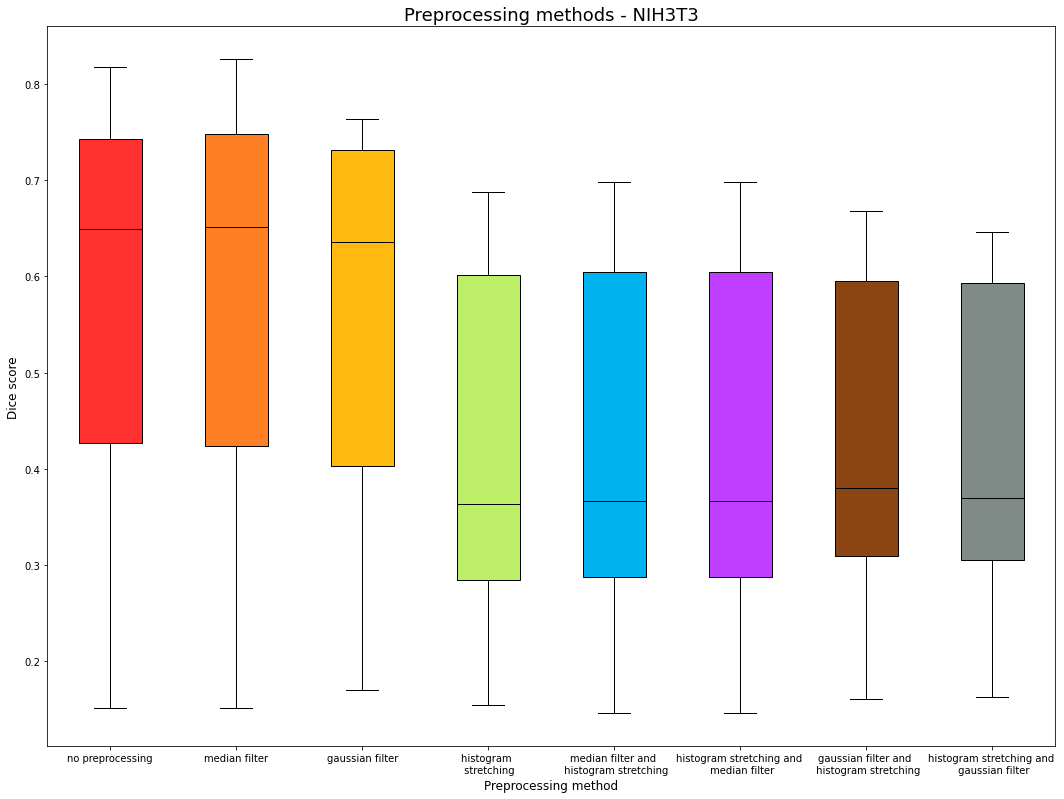

In [28]:
# Dice score - preprocessing - NIH3T3-dataset - boxplot

data_NIH3T3 = [NIH3T3_no_preprocessing , NIH3T3_median_filter , NIH3T3_gaussian_filter , NIH3T3_histogram_stretching , NIH3T3_median_filter_histogram_stretching , NIH3T3_histogram_stretching_median_filter , NIH3T3_gaussian_filter_histogram_stretching , NIH3T3_histogram_stretching_gaussian_filter]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - NIH3T3' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_NIH3T3, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)